# Lab 07. 스플라인 보간법 실습
---

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import CubicSpline

- 시계열 데이터를 생성하고 결측치를 생성한다. 그리고 결측치를 확인해본다.

In [4]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})
print(data)

# 결측치 생성
# 100 ~ 200 -> NAN 
data.loc[100:200, 'Value'] = np.nan 

# 결측치 체크 확인 
print(data.loc[100:200])

          Date     Value
0   2023-01-01 -0.283539
1   2023-01-02  0.106484
2   2023-01-03 -0.040787
3   2023-01-04  0.652885
4   2023-01-05  0.594136
..         ...       ...
995 2025-09-22 -0.931624
996 2025-09-23  0.277308
997 2025-09-24  0.726457
998 2025-09-25 -1.048141
999 2025-09-26 -0.572054

[1000 rows x 2 columns]
          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


- 스플라인 보간법을 적용하여 결측치를 처리해본다. (보간법 적용)
    - 스플라인 보간법은 유효한 데이터에 대해서만 적용이 가능하다. 그래서 결측치를 제거하거나 대처하는 작업이 필요하다. 

In [6]:
data['Value_filed'] = data['Value'].interpolate(method='linear')

print(data.loc[100:200])

          Date  Value  Value_filed
100 2023-04-11    NaN     1.815090
101 2023-04-12    NaN     1.797465
102 2023-04-13    NaN     1.779840
103 2023-04-14    NaN     1.762216
104 2023-04-15    NaN     1.744591
..         ...    ...          ...
196 2023-07-16    NaN     0.123121
197 2023-07-17    NaN     0.105496
198 2023-07-18    NaN     0.087871
199 2023-07-19    NaN     0.070247
200 2023-07-20    NaN     0.052622

[101 rows x 3 columns]


In [11]:
# 스플라인 보간법 적용 
spl = CubicSpline(data.index, data['Value_filed'])
data['Value_spline'] = spl(data.index)

print(data.loc[100:200])

          Date  Value  Value_filed  Value_spline
100 2023-04-11    NaN     1.815090      1.815090
101 2023-04-12    NaN     1.797465      1.797465
102 2023-04-13    NaN     1.779840      1.779840
103 2023-04-14    NaN     1.762216      1.762216
104 2023-04-15    NaN     1.744591      1.744591
..         ...    ...          ...           ...
196 2023-07-16    NaN     0.123121      0.123121
197 2023-07-17    NaN     0.105496      0.105496
198 2023-07-18    NaN     0.087871      0.087871
199 2023-07-19    NaN     0.070247      0.070247
200 2023-07-20    NaN     0.052622      0.052622

[101 rows x 4 columns]


- 시계열 데이터를 시각화 해본다.

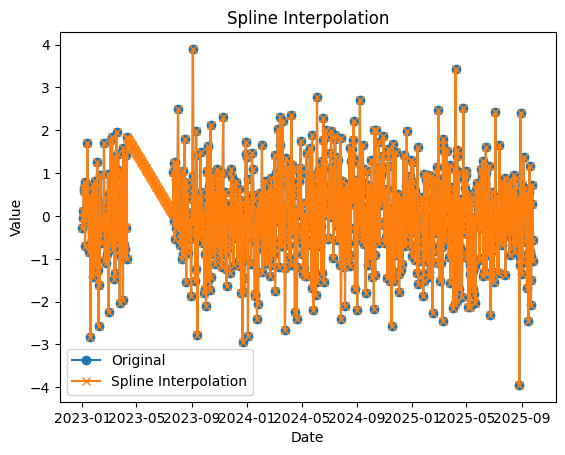

In [13]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spline Interpolation')
plt.legend()

plt.show()

> 스플라인 보간법은 연속성 있는 데이터에서 적용된다. 결측값을 제거하거나 다른 방법으로 대처하고 진행해야 한다.